In [1]:

%matplotlib inline
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# read data from .data format using sep to seperate the columns
df = pd.read_csv('parkinsons.data', sep=',')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# 
df.iloc[0,:]

name                phon_R01_S01_1
MDVP:Fo(Hz)                119.992
MDVP:Fhi(Hz)               157.302
MDVP:Flo(Hz)                74.997
MDVP:Jitter(%)             0.00784
MDVP:Jitter(Abs)           0.00007
MDVP:RAP                    0.0037
MDVP:PPQ                   0.00554
Jitter:DDP                 0.01109
MDVP:Shimmer               0.04374
MDVP:Shimmer(dB)             0.426
Shimmer:APQ3               0.02182
Shimmer:APQ5                0.0313
MDVP:APQ                   0.02971
Shimmer:DDA                0.06545
NHR                        0.02211
HNR                         21.033
status                           1
RPDE                      0.414783
DFA                       0.815285
spread1                  -4.813031
spread2                   0.266482
D2                        2.301442
PPE                       0.284654
Name: 0, dtype: object

In [4]:
df.shape

(195, 24)

In [5]:
# check the number of null data in each columns
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
# check for the columns of non-numerical type
df.loc[:, df.dtypes == 'object'].columns

Index(['name'], dtype='object')

In [7]:
# drop the name column since it is non-numerical data and not related to status
df = df.drop('name', axis='columns')

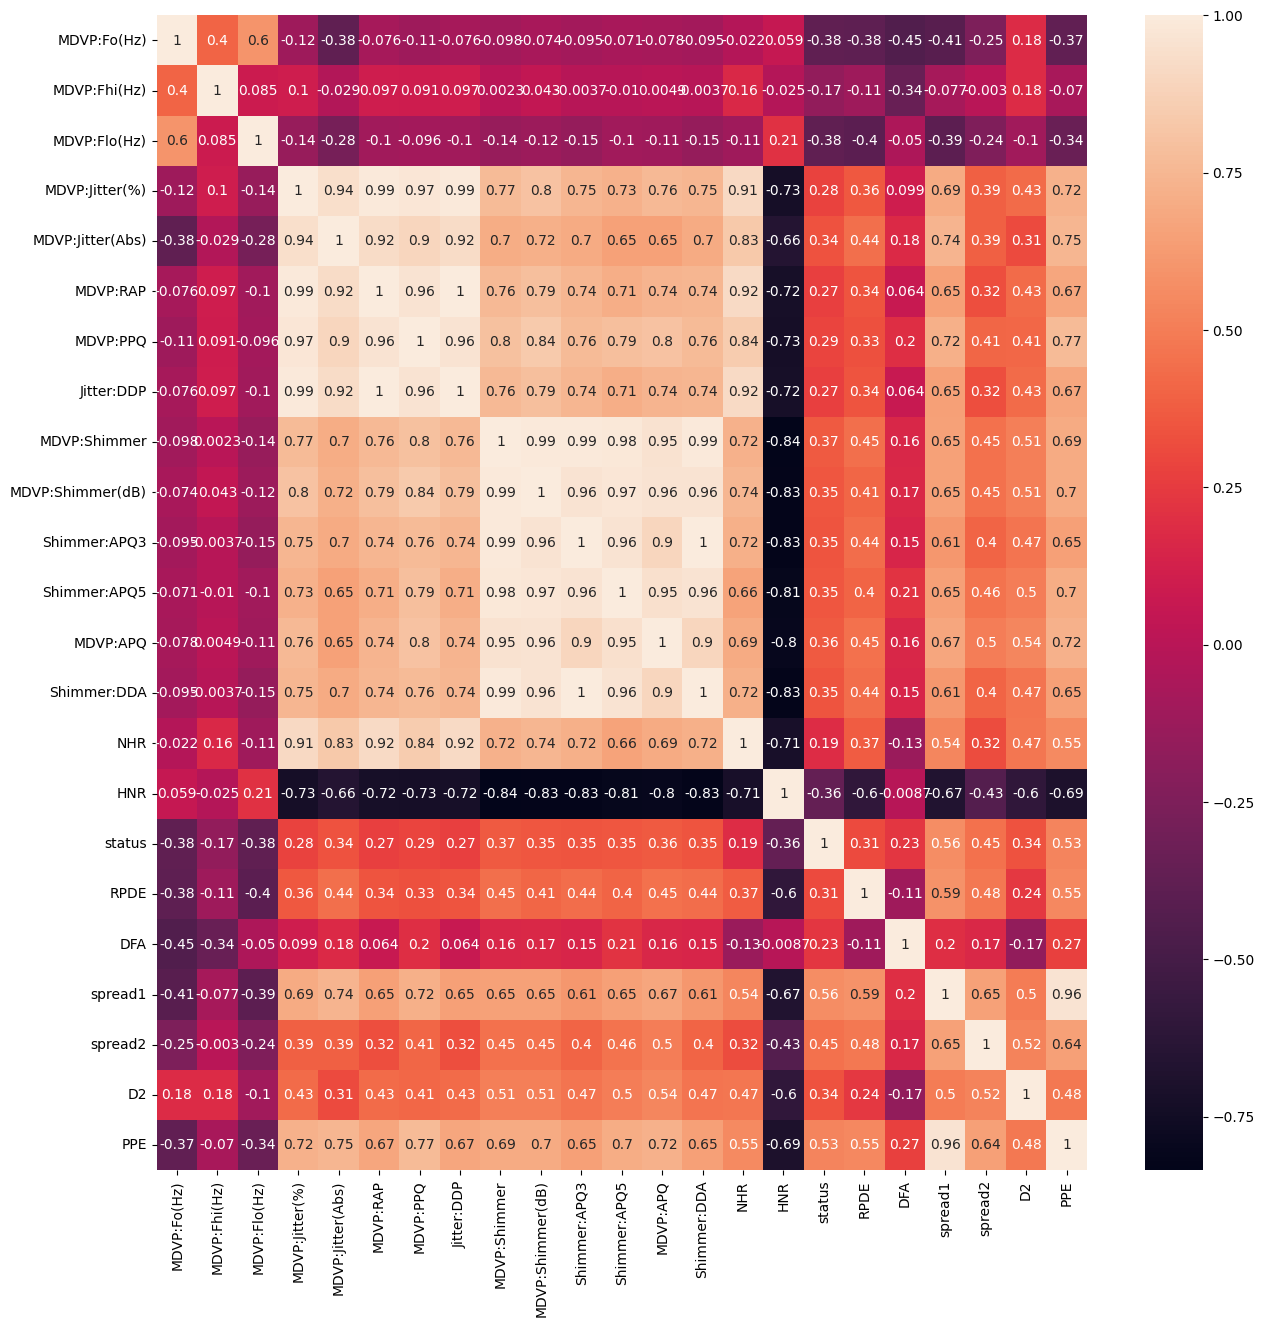

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(ax=ax,data=df.corr(), annot=True)

In [9]:
# duplicate the dataframse and use one-hot encoding for the status

one_hot = OneHotEncoder(sparse_output=False)
oh_status = pd.DataFrame(one_hot.fit_transform(df[['status']]))
oh_status.index = df.index

df_oh = pd.concat([df, oh_status], axis='columns').drop('status', axis='columns')
df_oh = df_oh.rename({0: "status-healthy", 1:'status-Parkinson'},axis='columns')
df_oh.columns = df_oh.columns.astype(str)
df_oh.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status-healthy,status-Parkinson
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.0,1.0
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.0,1.0
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.0,1.0
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.0,1.0
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.0,1.0


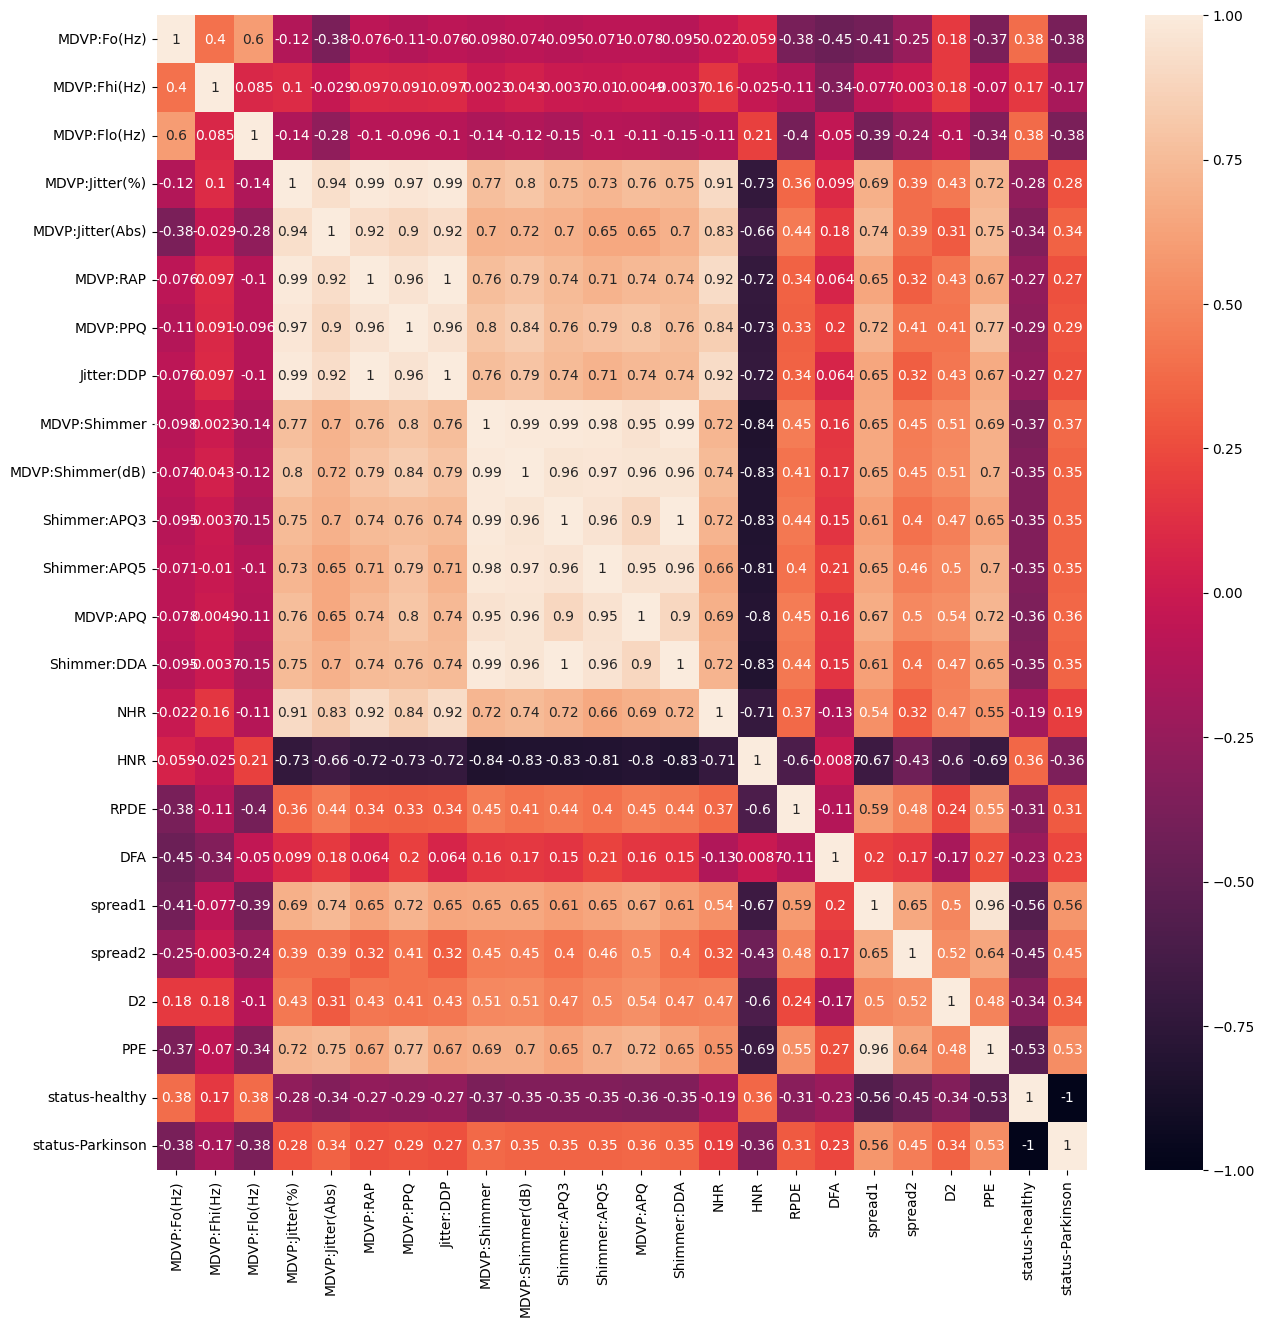

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(ax=ax,data=df_oh.corr(), annot=True)

## Some insight from heatmap diagram
* HNR is negatively correlated with most of the measures of variation in fundamental frequency and amplitute.
* Most of the Shimmers (variation of speech amplitude ) are highly correlated to each other, to ease the training of model, we may consider dropping most of the columns and leave one column 
* Also , Most MDVP columns (from Jitter to DDP) are highly correlated to each other, can also drop most of them


In [11]:
df_oh.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status-healthy', 'status-Parkinson'],
      dtype='object')

In [12]:
drop_col = [ 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA']

In [13]:
df_oh = df_oh.drop(drop_col, axis='columns')
df_oh.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status-healthy,status-Parkinson
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.0,1.0
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.0,1.0
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.0,1.0
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.0,1.0
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.0,1.0


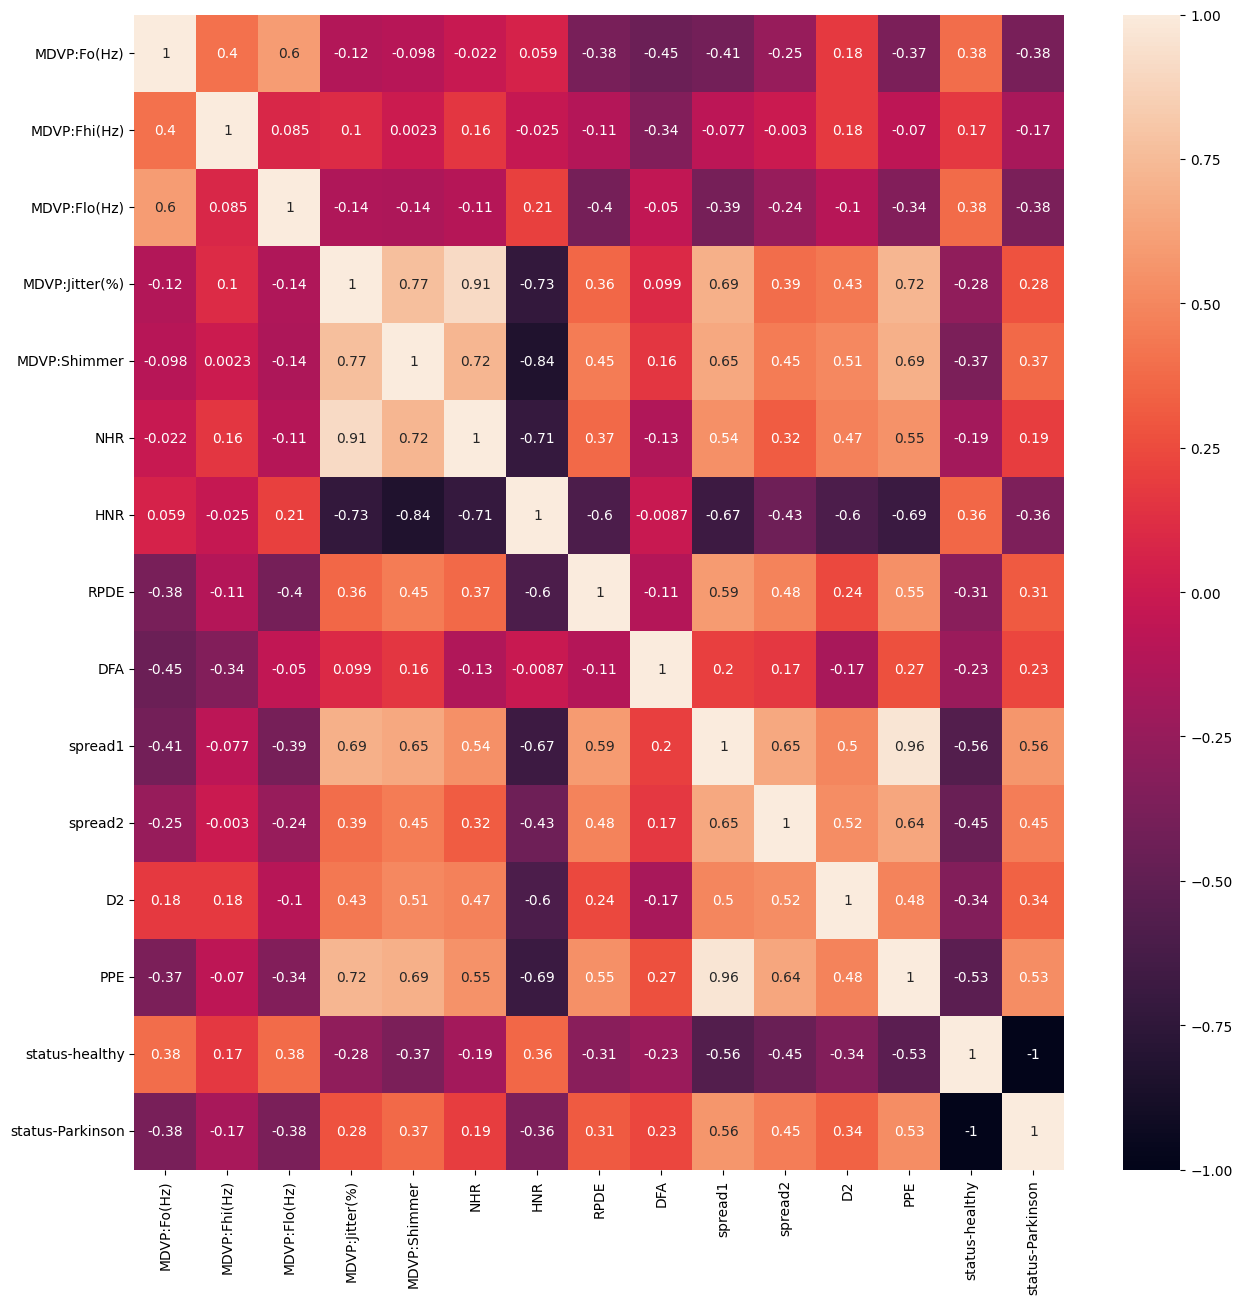

In [14]:
# make another heatmap diagram
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(ax=ax,data=df_oh.corr(), annot=True)

### Insight from the heatmap
* Most of the remaining columns have some kind of correlation with parkinson
* The one-hot encoding doesn't really affect the correlation. For the ease of ML model training, it is better to change it back to 1 columns and classify it as either classification problem or logistic regression problem 

In [15]:
df = df_oh.drop(['status-healthy'], axis='columns')
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status-Parkinson
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1.0
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1.0
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1.0
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1.0
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1.0


In [16]:
df = df.rename(columns={'status-Parkinson':'status'})
df['status'] = df['status'].astype(np.int8)
df.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


### Use cross validation to see whether boosting or bagging perform better

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [26]:
y = df['status']
X = df.drop(['status'], axis='columns')

X.head()

# we use grid search to find the best parameter for the random forest classifier
rfc = RandomForestClassifier()
score_rfc = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
print(f"score of random forest: {score_rfc.mean()}")


score of random forest: 0.8102564102564103
